In [100]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import read_csv # Importing the read_csv method 
                            # as it will allow us to write cleaner code
import matplotlib as plt
from natsort import index_natsorted
import seaborn as sns
sns.set_theme()
        
# Assigning variable to the datasets
# These names will represent the three different 
# data sets used to create this project

single_family_data = read_csv('/datasets/single_family_home.csv')
condo_data = read_csv('/datasets/median_condo_price.csv')
black_and_latino_data = read_csv('/datasets/black_and_latino_mortgage_rates.csv')

# Prints a message to show that everything is loaded up
print("All systems GO!")

All systems GO!


### Single Family Home Data Cleaning

In [101]:
# Removing NaN values by removing the 'Notes column 
# as those were the only 'NaN' values in the entire data set.
# The other two data sets were complete and did not need to be amended

# Prints off all the columns and the amount of NaN vals for each
# As shown below, There are no more 'NaN' values 
# as we removed the 'Notes'
print(f"Total number of 'NaN' inputs: \n\n{single_family_data.isna().sum()}\n")

# Shows all values which may be 'Null'
print(f"Total number of 'Null' inputs: \n{single_family_data.isnull().sum()}\n")

# Prints all of the coumn names
print(f"\n{single_family_data.columns}")

# Used the below command to remove the notes column as all of the values were 'NaN'
# If you do not run all cells it will trigger an error when re run

del single_family_data['Notes']

Total number of 'NaN' inputs: 

Municipality                            0
Communities Type                        0
Median Sale Price, Jan - June 2021      0
Median Sale Price, Jan - June 2022      0
% Change                                0
Notes                                 146
dtype: int64

Total number of 'Null' inputs: 
Municipality                            0
Communities Type                        0
Median Sale Price, Jan - June 2021      0
Median Sale Price, Jan - June 2022      0
% Change                                0
Notes                                 146
dtype: int64


Index(['Municipality', 'Communities Type',
       'Median Sale Price, Jan - June 2021',
       'Median Sale Price, Jan - June 2022', '% Change', 'Notes'],
      dtype='object')


In [102]:
# testing the columns post deletion of 'Notes' col
print(single_family_data.columns)

Index(['Municipality', 'Communities Type',
       'Median Sale Price, Jan - June 2021',
       'Median Sale Price, Jan - June 2022', '% Change'],
      dtype='object')


## First, Lets find out what we are dealing with first

Knowing what you are dealing with is a huge part of the battle, if all one sees is numbers and percentages, then it will not make any sense and I would not have done my job properly.

Being able to know what values mean helps the end user and every user in between. It may seem trivial to some but presenting this data in its correct order whill allow the viewer to quickly assess what the number means based on its placement on a: chart/graph/file

In [103]:
# Showing the column names to get a little 
# more insight into the values we will be seeing
def show_column_names():

  # Single family
  print("\nSngle family data:\n")
  for col in single_family_data.columns:
    print(col)

  # Condo
  print("\nCondo data:\n")
  for col in condo_data.columns:
    print(col)

  # Black And Latino mortgages
  print("\nBlack and Latino data:\n")
  for col in black_and_latino_data.columns:
    print(col)

show_column_names()


Sngle family data:

Municipality
Communities Type
Median Sale Price, Jan - June 2021
Median Sale Price, Jan - June 2022
% Change

Condo data:

Town
Community Type
Condo.2021
Condo.2022
Condo.PercChange

Black and Latino data:

Municipality
Community Type
Percent of Home Loans to Black and Latino Buyers


### Showing the Head and Tail

In [104]:
# This command will show us the first 5 rows of data
# The data is sorted in no particular order
# Just the order they were entered into the CSV file

single_family_data.head()

,Municipality,Communities Type,"Median Sale Price, Jan - June 2021","Median Sale Price, Jan - June 2022",% Change
0,Boston,Metro Core Communities,3462500,4400000,27.1%
1,Cambridge,Metro Core Communities,1537500,1775000,15.4%
2,Lowell,Regional Urban Centers,415000,439000,5.8%
3,Brockton,Regional Urban Centers,377500,430000,13.9%
4,Quincy,Regional Urban Centers,605000,640000,5.8%


In [105]:
# This command will show us the last 5 rows of data
single_family_data.tail()

,Municipality,Communities Type,"Median Sale Price, Jan - June 2021","Median Sale Price, Jan - June 2022",% Change
142,Essex,Developing Suburbs,625750,670000,7.1%
143,Dunstable,Developing Suburbs,617500,690000,11.7%
144,Nahant,Maturing Suburbs,805000,1030000,28.0%
145,Ashby,Rural Towns,350000,370250,5.8%
146,Plympton,Developing Suburbs,487500,525000,7.7%


## Let's start presenting the data


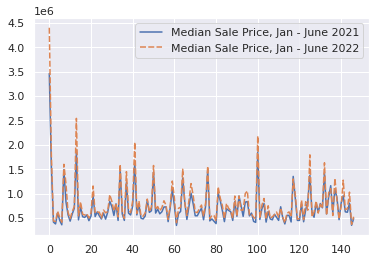

In [106]:
# The below is just a simple line graph using seaborn to show the data
sns.lineplot(data=single_family_data)

In [107]:
single_family_start_price = single_family_data.sort_values(by="Median Sale Price, Jan - June 2021", ascending=False)
print(single_family_start_price)
single_family_start_price.head()

    Municipality        Communities Type  Median Sale Price, Jan - June 2021  \
0         Boston  Metro Core Communities                             3462500   
100       Weston        Maturing Suburbs                             1852500   
13     Brookline       Streetcar Suburbs                             1850000   
41     Wellesley        Maturing Suburbs                             1665000   
1      Cambridge  Metro Core Communities                             1537500   
..           ...                     ...                                 ...   
113     Townsend      Developing Suburbs                              378000   
3       Brockton  Regional Urban Centers                              377500   
6       Lawrence  Regional Urban Centers                              360000   
145        Ashby             Rural Towns                              350000   
61       Wareham      Developing Suburbs                              347500   

     Median Sale Price, Jan - June 2022

,Municipality,Communities Type,"Median Sale Price, Jan - June 2021","Median Sale Price, Jan - June 2022",% Change
0,Boston,Metro Core Communities,3462500,4400000,27.1%
100,Weston,Maturing Suburbs,1852500,2182500,17.8%
13,Brookline,Streetcar Suburbs,1850000,2542000,37.4%
41,Wellesley,Maturing Suburbs,1665000,2055000,23.4%
1,Cambridge,Metro Core Communities,1537500,1775000,15.4%


In [108]:
# Using the natsort library I am able to naturally sort the values I would like
sorted_single_family_data = single_family_data.sort_values(by=["% Change"], ascending=True, key=lambda x: np.argsort(index_natsorted(single_family_data["% Change"])))
print(sorted_single_family_data)

     Municipality    Communities Type  Median Sale Price, Jan - June 2021  \
91        Wayland    Maturing Suburbs                              950000   
90       Kingston  Developing Suburbs                              535000   
48        Danvers    Maturing Suburbs                              615000   
32      Watertown   Streetcar Suburbs                              790000   
47         Milton    Maturing Suburbs                              870000   
..            ...                 ...                                 ...   
140  West Newbury  Developing Suburbs                              810000   
136        Marion  Developing Suburbs                              607500   
92        Ipswich  Developing Suburbs                              747500   
126     Groveland    Maturing Suburbs                              615000   
124      Rockport  Developing Suburbs                              837500   

     Median Sale Price, Jan - June 2022 % Change  
91                      

### What can we do with this data:

The sorting method allows us to sort and present data in a way that will let end users know which towns had the greatest changes (positive or negative) in price for single family homes in specictowns over the same period of time. 

##### What could people do with this information:

The uses are many, once could use this to make an informed decision on where they could potentially purchase a home for the greatest return... or they could be a family who is strapped for cash and looking to purchase a home without thinking about upside/downside in price. 

The uses don't only have to satisfy one group. The data is the data is the data,so the overall use of it, in my opinion, is impartial. 

In [109]:
community_type_single_family = single_family_data.sort_values(by=["Communities Type", 
                                                                  "% Change"], ascending=False, 
                                                              key=lambda x: np.argsort(index_natsorted(single_family_data["% Change"])))
community_type_single_family.head()


,Municipality,Communities Type,"Median Sale Price, Jan - June 2021","Median Sale Price, Jan - June 2022",% Change
124,Rockport,Developing Suburbs,837500,660000,-21.2%
126,Groveland,Maturing Suburbs,615000,521500,-15.2%
92,Ipswich,Developing Suburbs,747500,657500,-12.0%
136,Marion,Developing Suburbs,607500,550000,-9.5%
140,West Newbury,Developing Suburbs,810000,740000,-8.6%


### Making sense of the single family data


In [110]:
# Cross refrencing to show which community types experienced the greatest growth
